<a href="https://colab.research.google.com/github/adaick/Payoda_Test/blob/main/payoda_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For handling string
import string
# For performing mathematical operations
import math


In [2]:
# Importing dataset
df=pd.read_csv('hepatitis_csv.csv') 

In [3]:
#print shape of the data
print("Shape of data=>",df.shape)

Shape of data=> (155, 20)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [6]:
# review data from top
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [7]:
# check data for any null values
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [8]:
#Numeric Features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes
numeric_features.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [9]:
#Categorical Features
categoricals = df.select_dtypes(exclude=[np.number])
print(categoricals.dtypes)
categoricals.describe()

sex                object
steroid            object
antivirals           bool
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
histology            bool
class              object
dtype: object


,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,155,154,155,154,154,154,145,144,150,150,150,150,155,155
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,female,True,False,True,False,False,True,False,False,False,False,False,False,live
freq,139,78,131,100,93,122,120,84,120,99,130,132,85,123


In [10]:
# replacing all the srting values to numerical 
replace = {False: 0,True: 1,'die': 0,'live': 1,'female': 0,'male': 1}

df.replace(replace, inplace = True)


In [11]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,1,0
151,44,0,1.0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,NaN,1,1
152,61,0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,NaN,1,1
153,53,1,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,1,1


In [12]:
df = df.dropna()

In [13]:
values = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
df = df[values]
df.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1


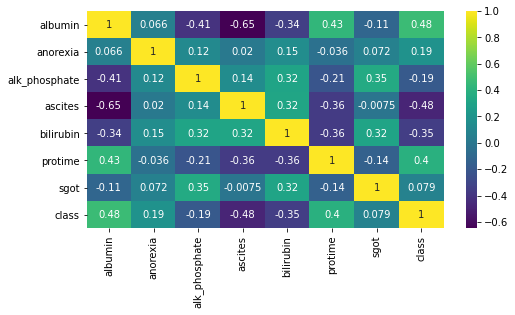

In [20]:
# To check correlation
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='viridis',annot=True)